In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [21]:
endpoint = 'https://data.nashville.gov/Police/Metro-Nashville-Police-Department-Incidents/2u6v-ujjs'

response = requests.get(endpoint)

In [22]:
endpoint = f"https://data.nashville.gov/resource/2u6v-ujjs.json?offense_description=BURGLARY- AGGRAVATED&$where=incident_occurred between '2022-01-01T12:00:00' and '2022-09-30T00:00:00'"

response = requests.get(endpoint)


In [23]:
res = response.json()
res

[{'primary_key': '20220167824_11',
  'incident_number': '20220167824',
  'report_type': 'D',
  'report_type_description': 'DISPATCHED',
  'incident_status_code': 'O',
  'incident_status_description': 'OPEN',
  'investigation_status': 'Open',
  'incident_occurred': '2022-04-07T15:00:00.000',
  'incident_reported': '2022-04-08T11:52:00.000',
  'incident_location': 'JACKSON ST',
  'latitude': '36.17',
  'longitude': '-86.8',
  'location_code': '22',
  'location_description': 'RESIDENCE, HOME',
  'offense_number': '1',
  'offense_nibrs': '220',
  'offense_description': 'BURGLARY- AGGRAVATED',
  'weapon_primary': '16',
  'weapon_description': 'Unarmed',
  'victim_number': '1',
  'domestic_related': False,
  'victim_type': 'I',
  'victim_description': 'INDIVIDUAL (18 AND OVER)',
  'victim_gender': 'U',
  'victim_race': 'W',
  'victim_ethnicity': 'Non-Hispanic',
  'victim_county_resident': 'NON RESIDENT',
  'mapped_location': {'type': 'Point', 'coordinates': [-86.8, 36.17]}},
 {'primary_key':

In [24]:
agg_burg = pd.DataFrame(res)

In [25]:
agg_burg

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,I,INDIVIDUAL (18 AND OVER),U,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN
2,20220027854_12,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN
3,20220032825_11,20220032825,D,DISPATCHED,O,OPEN,Open,2022-01-23T00:40:00.000,2022-01-24T06:57:00.000,BROOKWOOD TER,...,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}",5019,121,NaN
4,20220023736_11,20220023736,D,DISPATCHED,O,OPEN,Open,2022-01-15T10:00:00.000,2022-01-17T11:25:00.000,WEDGEWOOD AVE,...,B,BUSINESS,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8025,817,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20220376574_41,20220376574,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2022-07-31T20:55:00.000,2022-07-31T23:22:00.000,1017 1017,...,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.667, 36....",NaN,NaN,37013
996,20220389939_11,20220389939,D,DISPATCHED,O,OPEN,Open,2022-08-08T08:45:00.000,2022-08-08T12:28:00.000,NaN,...,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.65, 36.09]}",NaN,NaN,NaN
997,20220386358_14,20220386358,D,DISPATCHED,O,OPEN,Open,2022-08-06T00:00:00.000,2022-08-06T03:26:00.000,E TRINITY LN,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.74, 36.2]}",NaN,NaN,NaN
998,20220390095_11,20220390095,D,DISPATCHED,O,OPEN,Open,2022-08-08T13:00:00.000,2022-08-08T14:46:00.000,JOSEPH AVE,...,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.18]}",NaN,NaN,NaN


In [26]:
agg_burg.offense_description.unique

<bound method Series.unique of 0      BURGLARY- AGGRAVATED
1      BURGLARY- AGGRAVATED
2      BURGLARY- AGGRAVATED
3      BURGLARY- AGGRAVATED
4      BURGLARY- AGGRAVATED
               ...         
995    BURGLARY- AGGRAVATED
996    BURGLARY- AGGRAVATED
997    BURGLARY- AGGRAVATED
998    BURGLARY- AGGRAVATED
999    BURGLARY- AGGRAVATED
Name: offense_description, Length: 1000, dtype: object>

#### 1.  Using the 2020 American Community Survey API, obtain, for each census tract, the population (B01001_001E in the detailed tables) and the median income (S1901_C01_012E in the subject tables). Hint: Tennessee's FIPS code is 47 and Davidson County's FIPS code is 37.

In [27]:
endpoint_pop = 'https://api.census.gov/data/2020/acs/acs5?get=NAME,B01001_001E&for=tract:*&in=county:037&in=state:47'
response_pop = requests.get(endpoint_pop)
res_pop = response_pop.json()
population = pd.DataFrame(res_pop)
population

,0,1,2,3,4
0,NAME,B01001_001E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",3280,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",2704,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",3410,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",3292,47,037,018905


In [28]:
population

,0,1,2,3,4
0,NAME,B01001_001E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",3280,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",2704,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",3410,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",3292,47,037,018905


In [29]:
header = population.iloc[0] 
population= population[1:] 
population.columns = header

In [30]:
population

,NAME,B01001_001E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105
5,"Census Tract 191.06, Davidson County, Tennessee",4336,47,037,019106
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",3280,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",2704,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",3410,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",3292,47,037,018905


In [31]:
population = population.rename(columns={'B01001_001E':'Population'})
population

,NAME,Population,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105
5,"Census Tract 191.06, Davidson County, Tennessee",4336,47,037,019106
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",3280,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",2704,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",3410,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",3292,47,037,018905


In [32]:
#Median Income
endpoint = 'https://api.census.gov/data/2020/acs/acs5/subject?get=NAME,S1901_C01_012E&for=tract:*&in=state:47&in=county:037'
response = requests.get(endpoint)
res = response.json()
med_income = pd.DataFrame(res)

In [33]:
header = med_income.iloc[0] 
med_income= med_income[1:] 
med_income.columns = header

In [34]:
med_income = med_income.rename(columns={'S1901_C01_012E':'Median Income'})
med_income

,NAME,Median Income,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",44001,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",48485,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",50512,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",48271,47,037,019105
5,"Census Tract 191.06, Davidson County, Tennessee",65323,47,037,019106
...,...,...,...,...,...
170,"Census Tract 189.01, Davidson County, Tennessee",47500,47,037,018901
171,"Census Tract 189.02, Davidson County, Tennessee",75286,47,037,018902
172,"Census Tract 189.04, Davidson County, Tennessee",61750,47,037,018904
173,"Census Tract 189.05, Davidson County, Tennessee",65960,47,037,018905


In [35]:
pop_med_income = pd.merge(population, med_income, on=['NAME', 'state', 'county', 'tract'])

In [36]:
pop_med_income

,NAME,Population,state,county,tract,Median Income
0,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004,44001
1,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007,48485
2,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008,50512
3,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105,48271
4,"Census Tract 191.06, Davidson County, Tennessee",4336,47,037,019106,65323
...,...,...,...,...,...,...
169,"Census Tract 189.01, Davidson County, Tennessee",3280,47,037,018901,47500
170,"Census Tract 189.02, Davidson County, Tennessee",2704,47,037,018902,75286
171,"Census Tract 189.04, Davidson County, Tennessee",3410,47,037,018904,61750
172,"Census Tract 189.05, Davidson County, Tennessee",3292,47,037,018905,65960


## Part 2 - Spatial Joining and Data Merging <br>
Download the 2020 census tract shapefiles for Tennessee from https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2020.html. (The FIPS code for Tennessee is 47). Perform a spatial join to determine the census tract in which each burglary incident occurred.

In [83]:

shpfiles = gpd.read_file('data_tl/')



In [84]:
shpfiles.head( )

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,175,925200,47175925200,9252,Census Tract 9252,G5020,S,227429512,1667739,+35.7438100,-085.4940227,"POLYGON ((-85.61516 35.76106, -85.61509 35.761..."
1,47,175,925000,47175925000,9250,Census Tract 9250,G5020,S,480712883,1225717,+35.6695378,-085.4220628,"POLYGON ((-85.60513 35.70854, -85.60511 35.708..."
2,47,003,950201,47003950201,9502.01,Census Tract 9502.01,G5020,S,121774227,0,+35.6517480,-086.5575518,"POLYGON ((-86.64406 35.64029, -86.64375 35.642..."
3,47,003,950202,47003950202,9502.02,Census Tract 9502.02,G5020,S,110617191,700793,+35.5845755,-086.5790796,"POLYGON ((-86.66377 35.58189, -86.66367 35.582..."
4,47,093,003300,47093003300,33,Census Tract 33,G5020,S,5860088,229299,+36.0020586,-083.8371218,"POLYGON ((-83.86208 35.99255, -83.86207 35.992..."


In [85]:
#filter for 037
shpfiles= shpfiles[shpfiles['COUNTYFP']=='037']

In [86]:
shpfiles.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
10,47,037,019004,47037019004,190.04,Census Tract 190.04,G5020,S,2904633,0,+36.0699448,-086.7140690,"POLYGON ((-86.72632 36.07961, -86.72612 36.079..."
11,47,037,015404,47037015404,154.04,Census Tract 154.04,G5020,S,3857659,0,+36.1976330,-086.6144970,"POLYGON ((-86.63338 36.18618, -86.63327 36.186..."
12,47,037,018801,47037018801,188.01,Census Tract 188.01,G5020,S,8463283,0,+36.0609910,-086.7571310,"POLYGON ((-86.77516 36.05341, -86.77516 36.053..."
13,47,037,014400,47037014400,144,Census Tract 144,G5020,S,1912531,0,+36.1575954,-086.8057394,"POLYGON ((-86.82252 36.15304, -86.82220 36.153..."
14,47,037,011001,47037011001,110.01,Census Tract 110.01,G5020,S,7509312,13081,+36.2227139,-086.7535596,"POLYGON ((-86.77646 36.20665, -86.77641 36.207..."


In [87]:
shpfiles.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

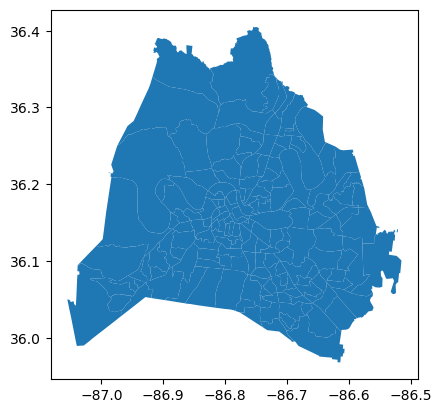

In [88]:
shpfiles.plot();

In [58]:
#Going back to agg_burg
agg_burg.head()

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,I,INDIVIDUAL (18 AND OVER),U,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN
2,20220027854_12,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN
3,20220032825_11,20220032825,D,DISPATCHED,O,OPEN,Open,2022-01-23T00:40:00.000,2022-01-24T06:57:00.000,BROOKWOOD TER,...,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}",5019,121,NaN
4,20220023736_11,20220023736,D,DISPATCHED,O,OPEN,Open,2022-01-15T10:00:00.000,2022-01-17T11:25:00.000,WEDGEWOOD AVE,...,B,BUSINESS,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8025,817,NaN


In [89]:
from shapely.geometry import Point
import shapely

In [90]:
#Grab long and lat from agg_burg and assign it to new column geometry
agg_burg['geometry'] = gpd.points_from_xy(agg_burg['longitude'], agg_burg['latitude'])

In [91]:
#Convert to GeoDataFrame
agg_burg_geo = gpd.GeoDataFrame(agg_burg, crs = df.crs, geometry=agg_burg['geometry'])

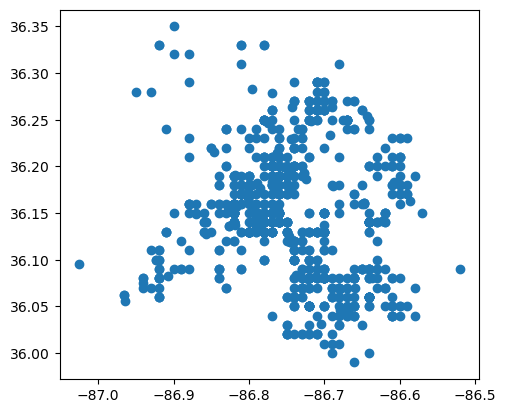

In [92]:
agg_burg_geo.plot();

In [93]:
type(agg_burg_geo)

geopandas.geodataframe.GeoDataFrame

In order to combine these two GeoDataFrames, we'll use a spatial join, which allows us to combine based on the spatial relationship between their geometries. 

In [94]:
agg_burg_shpfiles = gpd.sjoin(agg_burg_geo, shpfiles, predicate = 'within')

In [95]:
agg_burg_shpfiles.head()

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
135,20220285055_11,20220285055,D,DISPATCHED,O,OPEN,Open,2022-06-04T13:17:00.000,2022-06-09T13:17:00.000,IRELAND ST,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
175,20220059646_11,20220059646,D,DISPATCHED,O,OPEN,Open,2022-02-08T21:00:00.000,2022-02-08T22:49:00.000,14TH AVE N,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
229,20220070314_11,20220070314,D,DISPATCHED,O,OPEN,Open,2022-02-15T05:00:00.000,2022-02-15T11:10:00.000,IRELAND ST,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
323,20220206351_22,20220206351,D,DISPATCHED,O,OPEN,Open,2022-04-27T22:00:00.000,2022-04-28T09:28:00.000,IRELAND ST,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511


In [96]:
type(agg_burg_shpfiles)

geopandas.geodataframe.GeoDataFrame

In [98]:
agg_burg_shpfiles.columns

Index(['primary_key', 'incident_number', 'report_type',
       'report_type_description', 'incident_status_code',
       'incident_status_description', 'investigation_status',
       'incident_occurred', 'incident_reported', 'incident_location',
       'latitude', 'longitude', 'location_code', 'location_description',
       'offense_number', 'offense_nibrs', 'offense_description',
       'weapon_primary', 'weapon_description', 'victim_number',
       'domestic_related', 'victim_type', 'victim_description',
       'victim_gender', 'victim_race', 'victim_ethnicity',
       'victim_county_resident', 'mapped_location', 'rpa', 'zone', 'zip_code',
       'geometry', 'index_right', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID',
       'NAME', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON'],
      dtype='object')

(4). Aggregate the data by census tract. Warning: each incident can appear multiple times if there are multiple victims, so be sure that you aren't double-counting any incidents. Which census tract had the highest number of burglaries? Which census tract had the highest number of burglaries per 1000 residents? Note: Make sure that you keep all census tracts, not just those that have had a burglary.

In [100]:
agg_burg_shpfiles['NAMELSAD'].value_counts() #count only unique incidents

Census Tract 163       60
Census Tract 169       35
Census Tract 160       33
Census Tract 170       30
Census Tract 113       26
                       ..
Census Tract 191.21     1
Census Tract 122        1
Census Tract 104.03     1
Census Tract 116        1
Census Tract 127.02     1
Name: NAMELSAD, Length: 159, dtype: int64

In [ ]:
#use incident number, incident number appears multiple times
#may be census tracts that don't have any burglaries, do not exclude ones with zero observations
#when merging later keep rows from census 

In [ ]:
#each row corresponds to a bulglary

In [75]:
#aggburg_tntracts = gpd.GeoDataFrame(agg_burg, crs=df.crs, geometry = agg_burg['geometry'])